# SHICB kiszámítása a top 5 bajnokságban 2000 és 2023 között

Programcsomagok importálása

In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Lokális adatbázis importálása

In [2]:
df = pd.read_csv('A top 5 bajnokság 2000-2023 közötti adatai.csv')
df2 = df

Adatok szétválasztása országonként, adatbázismásolatok elkészítése

In [5]:
eng_df = df2.loc[df2['League'] == 'Premier-League']
spa_df = df2.loc[df2['League'] == 'La-Liga']
ita_df = df2.loc[df2['League'] == 'Serie-A']
ger_df = df2.loc[df2['League'] == 'Bundesliga']
fra_df = df2.loc[df2['League'] == 'Ligue-1']

eng_share = eng_df
spa_share = spa_df
ita_share = ita_df
ger_share = ger_df
fra_share = fra_df

Szükséges számított mezők létrehozása és kiszámítása

In [6]:
pd.options.mode.chained_assignment = None  # default='warn'
#eng_share['Share'] = eng_share['Pts'] / eng_share.groupby('Season')['Pts'].transform(lambda x: x.sum())
eng_share['Share'] = eng_df['Pts'] / eng_df.groupby('Season')['Pts'].transform(lambda x: x.sum())
eng_share['Share2'] = pow(eng_share['Share'], 2)
eng_season_HHI = eng_share.groupby('Season')['Share2'].sum().to_frame()
eng_season_HHI['HICB'] = (eng_season_HHI['Share2'] / (1/20)) * 100
eng_season_HHI['SHICB'] = (eng_season_HHI['HICB'] / np.where(eng_share.groupby('Season')['Pts'].count() == 20, 136.8421, 137.2549)) * 100 

spa_share['Share'] = spa_df['Pts'] / spa_df.groupby('Season')['Pts'].transform(lambda x: x.sum())
spa_share['Share2'] = pow(spa_share['Share'], 2)
spa_season_HHI = spa_share.groupby('Season')['Share2'].sum().to_frame()
spa_season_HHI['HICB'] = (spa_season_HHI['Share2'] / (1/20)) * 100
spa_season_HHI['SHICB'] = (spa_season_HHI['HICB'] / np.where(spa_share.groupby('Season')['Pts'].count() == 20, 136.8421, 137.2549)) * 100 

ita_share['Share'] = ita_df['Pts'] / ita_df.groupby('Season')['Pts'].transform(lambda x: x.sum())
ita_share['Share2'] = pow(ita_share['Share'], 2)
ita_season_HHI = ita_share.groupby('Season')['Share2'].sum().to_frame()
ita_season_HHI['HICB'] = (ita_season_HHI['Share2'] / (1/ ita_share.groupby('Season')['Pts'].count())) * 100
ita_season_HHI['SHICB'] = (ita_season_HHI['HICB'] / np.where(ita_share.groupby('Season')['Pts'].count() == 20, 136.8421, 137.2549)) * 100 

ger_share['Share'] = ger_df['Pts'] / ger_df.groupby('Season')['Pts'].transform(lambda x: x.sum())
ger_share['Share2'] = pow(ger_share['Share'], 2)
ger_season_HHI = ger_share.groupby('Season')['Share2'].sum().to_frame()
ger_season_HHI['HICB'] = (ger_season_HHI['Share2'] / (1/ ger_share.groupby('Season')['Pts'].count())) * 100
ger_season_HHI['SHICB'] = (ger_season_HHI['HICB'] / np.where(ger_share.groupby('Season')['Pts'].count() == 20, 136.8421, 137.2549)) * 100 

fra_share['Share'] = fra_df['Pts'] / fra_df.groupby('Season')['Pts'].transform(lambda x: x.sum())
fra_share['Share2'] = pow(fra_share['Share'], 2)
fra_season_HHI = fra_share.groupby('Season')['Share2'].sum().to_frame()
fra_season_HHI['HICB'] = (fra_season_HHI['Share2'] / (1/ fra_share.groupby('Season')['Pts'].count())) * 100
fra_season_HHI['SHICB'] = (fra_season_HHI['HICB'] / np.where(fra_share.groupby('Season')['Pts'].count() == 20, 136.8421, 137.2549)) * 100 

HICB = pd.concat([eng_season_HHI['HICB'], ita_season_HHI['HICB'], spa_season_HHI['HICB'], ger_season_HHI['HICB'], fra_season_HHI['HICB']],
                 axis = 1, keys = ['eng', 'ita', 'spa', 'ger', 'fra'])

SHICB = pd.concat([eng_season_HHI['SHICB'], ita_season_HHI['SHICB'], spa_season_HHI['SHICB'], ger_season_HHI['SHICB'], fra_season_HHI['SHICB']],
                 axis = 1, keys = ['eng', 'ita', 'spa', 'ger', 'fra'])


SHICB adatbázis exportálása

In [11]:
SHICB.iloc[::-1]

SHICB.to_csv(f'A top 5 bajnokság SHICB értéke 2000 és 2023 között', encoding = 'utf-8', index = False)

SHICB.head(5)

,eng,ita,spa,ger,fra
Season,,,,,
2001,78.098388,79.439563,77.081088,76.107510,76.228286
2002,80.240221,80.063192,75.983632,79.861917,76.390624
2003,78.990689,79.441961,77.292463,76.731666,76.847391
2004,79.083234,82.570665,77.051564,79.187774,78.092598
2005,80.715941,78.294401,78.371219,78.787478,75.975078


SHICB ábrák elkészítése és exportálása

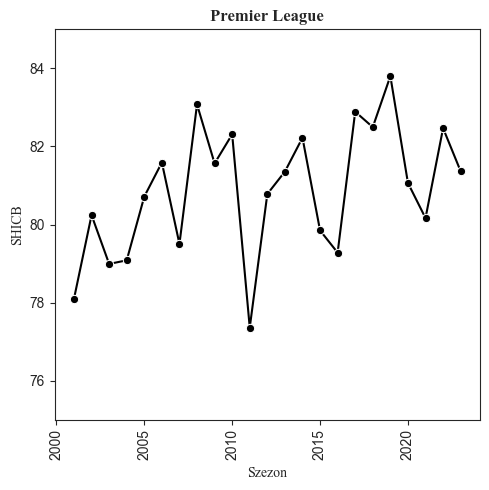

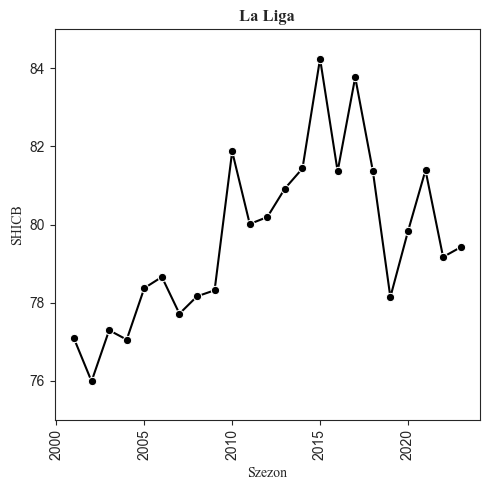

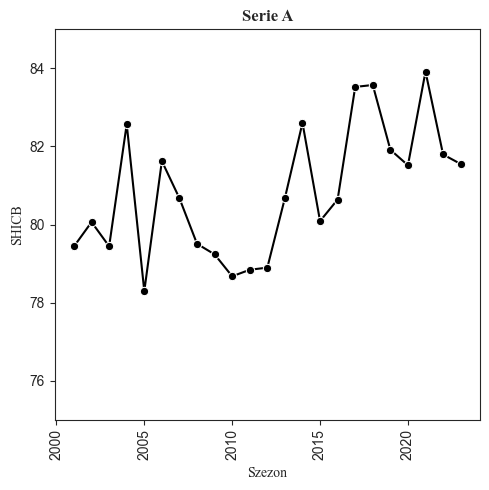

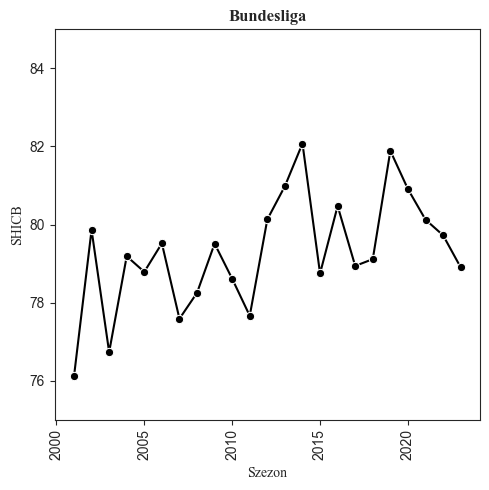

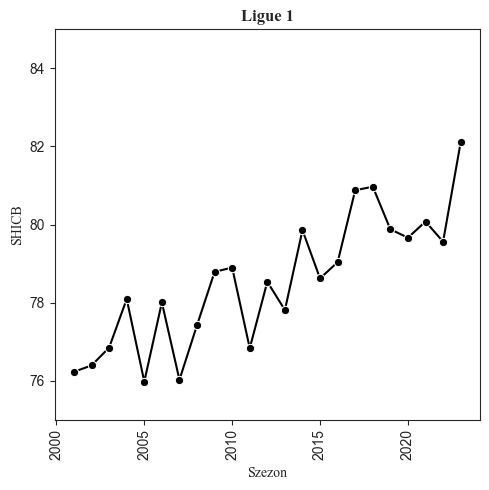

In [139]:
font = {'fontname' : 'Times New Roman'}

fig = plt.figure(figsize = (5,5), linewidth = 1)

sns.set_style("ticks", {'axes.grid' : False})

plt.xticks(rotation=90)

sns.lineplot(data = SHICB, x = SHICB.index, y = 'eng', color = 'black', marker = 'o')

plt.title('Premier League', **font, fontweight = 'bold')
plt.xlabel('Szezon', **font)
plt.ylabel('SHICB', **font)

plt.ylim(75, 85)
plt.tight_layout()

plt.savefig("pics/eng_SHICB.png")


fig = plt.figure(figsize = (5,5), linewidth = 1)

sns.set_style("ticks", {'axes.grid' : False})

plt.xticks(rotation=90)

sns.lineplot(data = SHICB, x = SHICB.index, y = 'spa', color = 'black', marker = 'o')

plt.title('La Liga', **font, fontweight = 'bold')
plt.xlabel('Szezon', **font)
plt.ylabel('SHICB', **font)

plt.ylim(75, 85)
plt.tight_layout()

plt.savefig("pics/spa_SHICB.png")


fig = plt.figure(figsize = (5,5), linewidth = 1)

sns.set_style("ticks", {'axes.grid' : False})

plt.xticks(rotation=90)

sns.lineplot(data = SHICB, x = SHICB.index, y = 'ita', color = 'black', marker = 'o')

plt.title('Serie A', **font, fontweight = 'bold')
plt.xlabel('Szezon', **font)
plt.ylabel('SHICB', **font)

plt.ylim(75, 85)
plt.tight_layout()

plt.savefig("pics/ita_SHICB.png")


fig = plt.figure(figsize = (5,5), linewidth = 1)

sns.set_style("ticks", {'axes.grid' : False})

plt.xticks(rotation=90)

sns.lineplot(data = SHICB, x = SHICB.index, y = 'ger', color = 'black', marker = 'o')

plt.title('Bundesliga', **font, fontweight = 'bold')
plt.xlabel('Szezon', **font)
plt.ylabel('SHICB', **font)

plt.ylim(75, 85)
plt.tight_layout()

plt.savefig("pics/ger_SHICB.png")


fig = plt.figure(figsize = (5,5), linewidth = 1)

sns.set_style("ticks", {'axes.grid' : False})

plt.xticks(rotation=90)

sns.lineplot(data = SHICB, x = SHICB.index, y = 'fra', color = 'black', marker = 'o')

plt.title('Ligue 1', **font, fontweight = 'bold')
plt.xlabel('Szezon', **font)
plt.ylabel('SHICB', **font)

plt.ylim(75, 85)
plt.tight_layout()

plt.savefig("pics/fra_SHICB.png")

SHICB dobozábra elkészítése és exportálása

C:\Users\Leon\AppData\Local\Temp\ipykernel_4228\1365774193.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bp.set_xticklabels(xlabels, rotation = 0, rotation_mode = 'anchor')


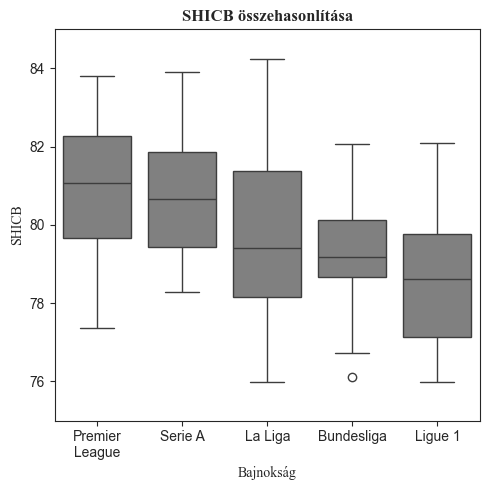

In [140]:
font = {'fontname' : 'Times New Roman'}

fig = plt.figure(figsize = (5,5), linewidth = 1)

sns.set_style("ticks", {'axes.grid' : False})

plt.xticks(rotation=90)

bp = sns.boxplot(data = SHICB, color = 'grey')
bp.set(xticklabels = []) 

plt.title('SHICB összehasonlítása', **font, fontweight = 'bold')
xlabels = ['Premier\nLeague', 'Serie A', 'La Liga', 'Bundesliga', 'Ligue 1']
bp.set_xticklabels(xlabels, rotation = 0, rotation_mode = 'anchor')
#plt.xticks(rotation = 0, ha = 'right')
plt.xlabel('Bajnokság', **font)
plt.ylabel('SHICB', **font)

plt.ylim(75, 85)
plt.tight_layout()

plt.savefig("pics/boxplot_SHICB.png")

Két kiemelt eset ábrájának elkészíétse

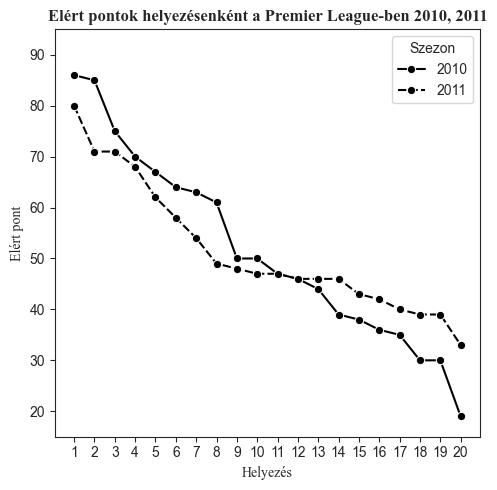

In [116]:
font = {'fontname' : 'Times New Roman'}

fig = plt.figure(figsize = (5,5), linewidth = 1)

sns.set_style("ticks", {'axes.grid' : False})


p = sns.lineplot(data=eng_share.loc[eng_share['Season'].isin([2010, 2011])], x = 'Rk', y = 'Pts', marker = "o", color = 'black', style = 'Season')


plt.title('Elért pontok helyezésenként a Premier League-ben 2010, 2011', **font, fontweight = 'bold')

p.set_xticks(range(1, 21))

plt.xlabel('Helyezés', **font)
plt.ylabel('Elért pont', **font)

p.legend(title = 'Szezon')

plt.ylim(15, 95)
plt.tight_layout()

plt.savefig("pics/eng_SHICB_2010-2011.png")

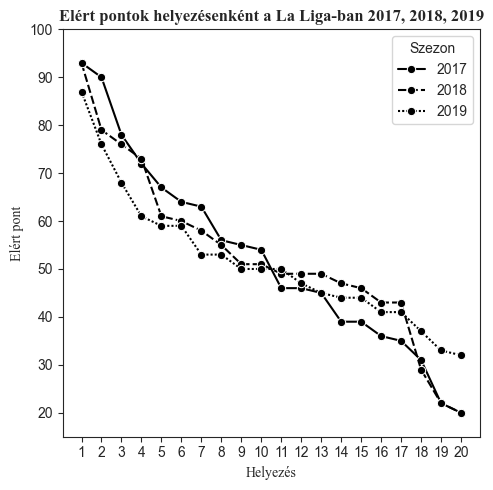

In [142]:
font = {'fontname' : 'Times New Roman'}

fig = plt.figure(figsize = (5,5), linewidth = 1)

sns.set_style("ticks", {'axes.grid' : False})


p = sns.lineplot(data=spa_share.loc[spa_share['Season'].isin([2017, 2018, 2019])], x = 'Rk', y = 'Pts', marker = "o", color = 'black', style = 'Season')


plt.title('Elért pontok helyezésenként a La Liga-ban 2017, 2018, 2019', **font, fontweight = 'bold')

p.set_xticks(range(1, 21))

plt.xlabel('Helyezés', **font)
plt.ylabel('Elért pont', **font)

p.legend(title = 'Szezon')

plt.ylim(15, 100)
plt.tight_layout()

plt.savefig("pics/spa_SHICB_2017-2019.png")